## Creation of Domains

A domain is an important part of each variable.

Therefore, this notebook gives a small overview of all domain types and shows a small example on how to create and load different domains.
#### Implemented Domains
* 1D: Interval

* 2D: Rectangle, Circle, Triangle, Polygon2D

* 3D: Polygon3D

* Operations: Cut ($A \setminus B$), Union ($A \cup B$), Intersection ($A\cap B$)

All domains can be imported from _torchphysics.problem.domain_. For further information of each domain, check the specific documentation of each class.

Every domain has the build in functionality to sample points inside and at the boundary. This is happens over the methods _sample_inside_ and _sample_boundary_. All domains have different possibilities on how to create points, always implemented is a _'random'_ (uniform) and a _'grid'_ sampling.

Additional strategies depend on the domain. For example _Interval_ can sample only the left or right bounds, with the commands _'lower_bound_only'_ and _'upper_bound_only'_.  

Another important part, is the possibility to load already existing 3D polygons. For this, the python library _Trimesh_ is used. Supported are different file types, for example .stl, .obj and more.

### Example 1
Next is a small example on how to create a 2D domain. We create a rectangle and cut out a circle in the middle. First, we import the basic domains and create the instances:

In [1]:
from torchphysics.problem.domain import Rectangle, Circle

R = Rectangle([-5, 0], [0, -5], [0, 5]) # The rectangle can be orientated in any way.
# If only a simple rectangle domain is needed, everything is done and could be 
# connected to a variable. E.g. x = Variable(..., domain=R,...)
C = Circle([0, 0], 2)

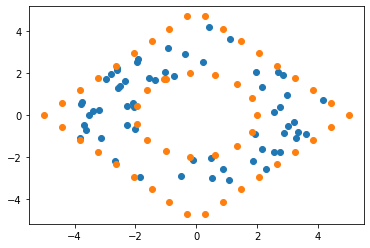

In [2]:
# Now we import Cut and use the previous two domains
from torchphysics.problem.domain.domain_operations import Cut
cut = Cut(R, C)

# create some points inside and at the boundary to see if everything worked.
import matplotlib.pyplot as plt
inside = cut.sample_inside(60, type='random') # set here number of used points and
bound = cut.sample_boundary(50, type='grid')  # the sampling strategy.
plt.scatter(inside[:, 0], inside[:, 1])
plt.scatter(bound[:, 0], bound[:, 1])


Now the domain is created and can be connceted to a variable. See ... to how create variables.

### Example 2
The next example shows how to load and project a 3D polygon. This is possible over the _Polygon3D_ class.

In [3]:
from torchphysics.problem.domain import Polygon3D
# Create either a polygon from hand, by giving the vertices and faces 
# of the polygon, or by loading a file. Here we load something
poly3D = Polygon3D(file_name='cornerplate.stl', file_type='stl')

# to check if the object is correctly loaded we can use:
# poly3D.mesh.show()


The domain is now a in 3D, but maybe we want to first solve the equation in a simpler setting. Therefore is is possible to project or cut the object with a plane, to create a 2D representation.
Here we project the domain on the xy-plane: 

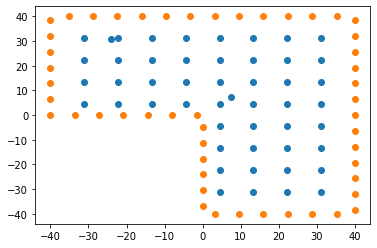

In [4]:
poly2D = poly3D.project_on_plane(plane_origin=[0, 0, 0], 
                                 plane_normal=[0, 0, 1])
# This returns a Polygon2D-object
inside = poly2D.sample_inside(50, type='grid') 
bound = poly2D.sample_boundary(50, type='grid') 
plt.scatter(inside[:, 0], inside[:, 1])
plt.scatter(bound[:, 0], bound[:, 1])
# If the grid sampling is not always perfect (some random points
# between the grid or some points are missing). This is because it is not 
# always possible to create a grid with the desired number of points.  